<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Data Analysis with Python</h1> <br>
        <b>taught by (alphabetic order) Lukas Arnold, Simone Arnold and My Linh Würzburger</b>
    </div>
    <div style="float:right;"> 
        <img src="images/cce_logo.png" style="width:250px;"/>
    </div>
</div>

### Video to image sequence using FFmpeg

_FFmpeg_ is a **free** cross-platform (Windows/Linux/macOS) solution to record, convert and stream audio and video.  
<br>
Note: _FFmpeg_ is a command-line tool not a Python-Package. Therefore it must be installed independently on your system.
<br>
<br>
Download and install instructions can be found here:

https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg.html

### <font color="green"> _Example 1: Video to image sequence and vice versa_ </font>

1. Download the folder example_media from moodle and open the video.
2. Open a command-line tool and try to create a image sequence of the given video using the following command:

```
 ffmpeg -i flame_to_img.mp4 -vf fps=1 frame_%03d.png
```

- This creates images which are numbered in the following order: flame_img_001.png, flame_img_002.png, usw.  
  (Here after 999 images, the last image will always be overwritten. One can solve this problem by changing %03d.png to a higher number -> string formatting as in Python)

### Working with images in Python

Before we continue, we should make a short excursion to the field of optics. Therefore, let us look at the following picture:
<br>
<img src="example_media/buw_building.jpg" style="width:450px;"/>
<br>
What we see are different colors which together show us different shapes and objects. But what we realy see, is a combination of only three colors.   
**Red, Green and Blue**.   
This method is called _Additive Color mixing_. By mixing those three light colors one can create up to 16.7 Million colors!
<br>
<br>
The following link leads to a simple RGB color slider:
[RGB-Slider](rgb-selector-master/index.html)

1. Try to create the 'color' white!
2. What is the RGB Value?

Now let us open the example image with Python!

(512, 768, 3)


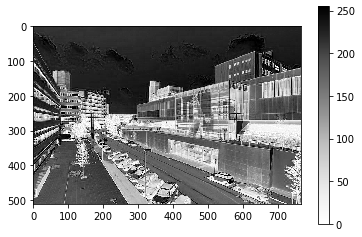

In [10]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('example_media/buw_building.jpg')
# print(image)
print(image.shape)
plt.imshow(image[:,:,2], cmap="Greys")
plt.colorbar()
plt.show()

Next, we should look at its shape!

In [2]:
img_shape = image.shape
print(img_shape)

(512, 768, 3)


What do we see here?  
The _.shape_ function return a tuple of number of rows, columns and channels. Here our rows are the is the height of our image in pixel. Accordingly the columns are the width of the picture in pixels! The last element in the tuple are the channels. The word channels refer to the colors Red (Channel 0), Green (Channel 1) and Blue (Channel 2)!

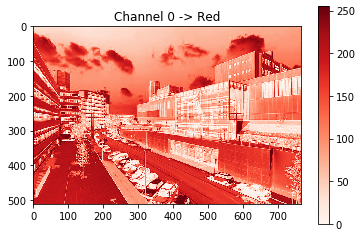

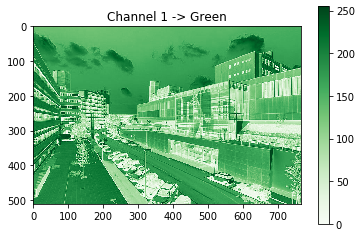

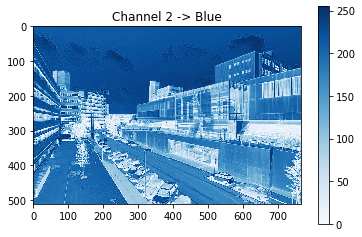

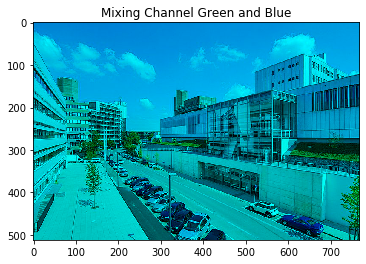

In [11]:
# here the paramter cmap is not needed. It just colors the image. Delete this paramter to see the difference!
plt.imshow(image[:,:,0], cmap="Reds")
plt.colorbar()
plt.title("Channel 0 -> Red")
plt.show()
plt.imshow(image[:,:,1], cmap="Greens")
plt.colorbar()
plt.title("Channel 1 -> Green")
plt.show()
plt.imshow(image[:,:,2], cmap="Blues")
plt.colorbar()
plt.title("Channel 2 -> Blue")
plt.show()

image_temp = np.array(image)
image_temp[:,:,0] = 0

plt.imshow(image_temp)
plt.title("Mixing Channel Green and Blue")
plt.show()

Now lets crop our image!

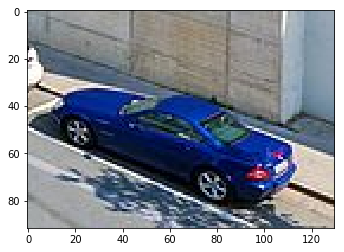

In [4]:
image_cut = np.array(image[420:, 570:700, :])
plt.imshow(image_cut)

Next we try to isolate our blue car. Therefore we plot each channel and determine which color gives the best shape of the car!

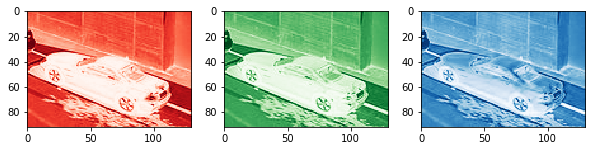

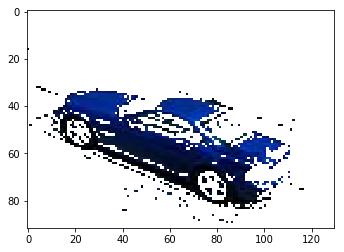

In [5]:
image_cut = np.array(image[420:, 570:700, :])

r = np.array(image_cut[:,:,0]) # red channel
g = np.array(image_cut[:,:,1]) # green channel
b = np.array(image_cut[:,:,2]) # blue channel

fig, ax = plt.subplots(1,3, figsize=(10,4))
ax[0].imshow(r,cmap='Reds')
ax[1].imshow(g,cmap='Greens')
ax[2].imshow(b,cmap='Blues')
plt.show()

# Here red seems to be the best one!

image_cut[r > 20] = 255 # Set all channel values of image_cut to 255, when the red value is larger than 20

plt.imshow(image_cut)
plt.show()


### Creating image sequence with Python and export it into a video format using FFmpeg

Now we want to show the course of a cruve over time with a series of pictures.
Therefore we first create an image sequence with Python

In [6]:
x = np.arange(1,20,0.1) # x-Array
y = 10*np.exp(-x*0.1)*np.sin((x)*10) # y-Array dumped_oszillator

for i in range(0,len(x)): # create a counter from 0 to the length of the x-array
    plt.plot(x,y, alpha=0.4, color='#1f77b4') # plot the complete graph with reduced opacity
    plt.plot(x[:i],y[:i], color='#1f77b4') # plot part of the graph from 0 to i
    plt.savefig("example_media/plot_img_{:03d}.png".format(i), dpi=300) # Save the plot using the counter as the filename!
    plt.close()

Now we can create a video using FFmpeg!
```
 ffmpeg -i plot_img_%03d.png video_name.mp4
```